Part 1:

In [26]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 
import random

In [27]:

#Import the image and display in a window
img = cv.imread('saphira.jpg')


#Create a kernle with a square matrix of 31x31
#divide the matrix by (31^2) = 961 to average it
kernelmean = np.ones((31,31),np.float32)/ 961

#Apply averaging kernel into image to filter
avgfilter = cv.filter2D(img,-1,kernelmean)

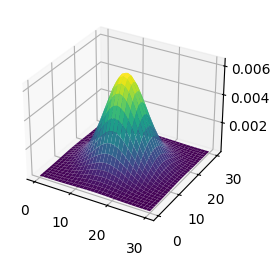

In [28]:


#Get Gaussian filter
gauss = cv.getGaussianKernel(31, 5)
gaus = np.outer(gauss,gauss)

#Surface plot of Gaussian Filter
n = 31
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection='3d')
x = np.arange(0, n, 1)
y = np.arange(0, n, 1)
X, Y = np.meshgrid(x, y)
Z = gaus.flatten()
ax.plot_surface(X, Y, gaus, cmap='viridis')
plt.show()

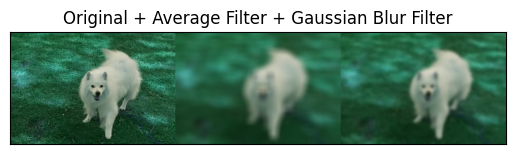

In [29]:

#Apply the Gaussian blur on the image
blur = cv.GaussianBlur(img,(31,31),5)

#Concatenate the images in the same window
window2 = cv.hconcat([img,avgfilter, blur])
# cv.imshow('Original + Average Filter + Gaussian Blur Filter', window2)
plt.imshow(window2)
plt.title('Original + Average Filter + Gaussian Blur Filter'), plt.xticks([]), plt.yticks([])
plt.show()


In [30]:
def add_noise(img):

    # Getting the dimensions of the image 
    row , col, c = img.shape
        
    # Randomly pick some pixels in the 
    # image for coloring them white 
    # Pick a random number between 300 and 10000 
    number_of_pixels = random.randint(300, 10000) 
    for i in range(number_of_pixels): 
            
        # Pick a random y coordinate 
        y_coord=random.randint(0, row - 1) 
            
        # Pick a random x coordinate 
        x_coord=random.randint(0, col - 1) 
            
        # Color that pixel to white 
        img[y_coord][x_coord] = 255
            
        # Randomly pick some pixels in 
        # the image for coloring them black 
        # Pick a random number between 300 and 10000 
    number_of_pixels = random.randint(300 , 10000) 
    for i in range(number_of_pixels): 
            
        # Pick a random y coordinate 
        y_coord=random.randint(0, row - 1) 
            
        # Pick a random x coordinate 
        x_coord=random.randint(0, col - 1) 
            
        # Color that pixel to black 
        img[y_coord][x_coord] = 0

        
    return img

In [31]:

#Convert the image to Grayscale to be used to add noise
#Save the image to the directory
#gray = cv.imread('saphira.jpg',cv.IMREAD_GRAYSCALE)
cv.imwrite('salt-n-pepper.jpg',add_noise(img)) 
salt_n_peppa = cv.imread('salt-n-pepper.jpg')

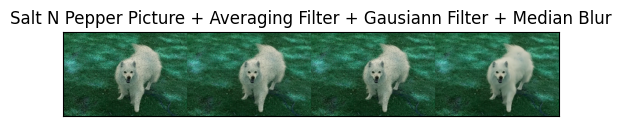

In [32]:
 
#Create a kernle with a square matrix of 3x3
#divide the matrix by 3^2 = 9 to average
kernelmean2 = np.ones((3,3),np.float32)/ 9

#Apply averaging kernel into image to filter
avgfilter2 = cv.filter2D(salt_n_peppa,-1,kernelmean2)


#Apply the Gaussian blur on the image
blur2 = cv.GaussianBlur(salt_n_peppa,(3,3),0.5) 


#Add Median Blur
med = cv.medianBlur(salt_n_peppa,3)

#Concatenate the images in the same window
window3 = cv.hconcat([salt_n_peppa,avgfilter2, blur2, med])
# cv.imshow('Salt N Pepper Picture + Averaging Filter + Gausiann Filter + Median Blur', window3)
plt.imshow(window3)
plt.title('Salt N Pepper Picture + Averaging Filter + Gausiann Filter + Median Blur'), plt.xticks([]), plt.yticks([])
plt.show()

# cv.waitKey(0)
# cv.destroyAllWindows() 

Part 2:

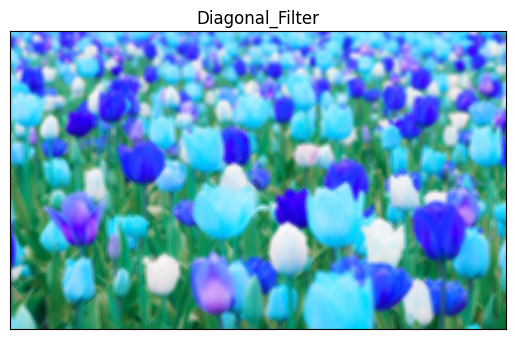

In [33]:
#Import image tulips.jpg
tulips = cv.imread('tulips.jpg')
tulips = cv.resize(tulips,(500,300))

#Create kernel with 1's on the diagonals, then divide by 9 for average
img_kernel = np.array([[1,0,0,0,1],[0,1,0,1,0], [0,0,1,0,0], [0,1,0,1,0],[1,0,0,0,1]]) 
img_kernel = img_kernel/9

flt_img = cv.filter2D(tulips,-1,img_kernel)

# cv.imshow('Diagonal_Filter', flt_img)
plt.imshow(flt_img)
plt.title('Diagonal_Filter'), plt.xticks([]), plt.yticks([])
plt.show()

Part 3:

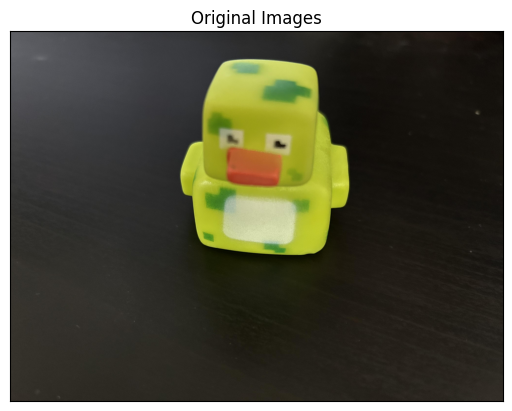

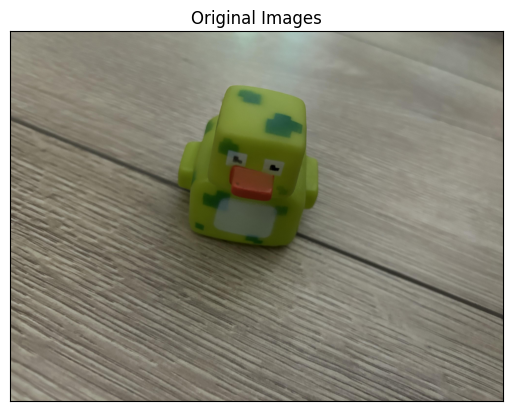

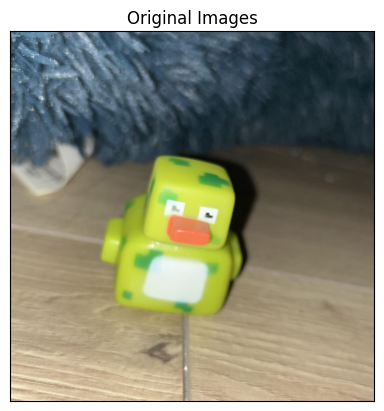

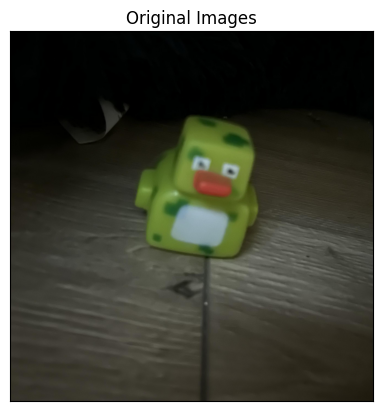

In [52]:
image_list = ['image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg']
test_images = [cv.imread(image_list[0]), cv.imread(image_list[1]), cv.imread(image_list[2]), cv.imread(image_list[3])]
 

for image in range(len(test_images)):
    test_images[image] = cv.cvtColor(test_images[image], cv.COLOR_BGR2RGB)
    plt.imshow(test_images[image])
    plt.title('Original Images'), plt.xticks([]), plt.yticks([])
    plt.show()



Testing the Sobel edge detection algorithm:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


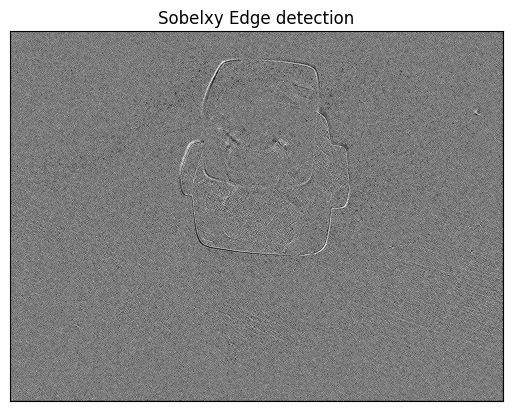

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


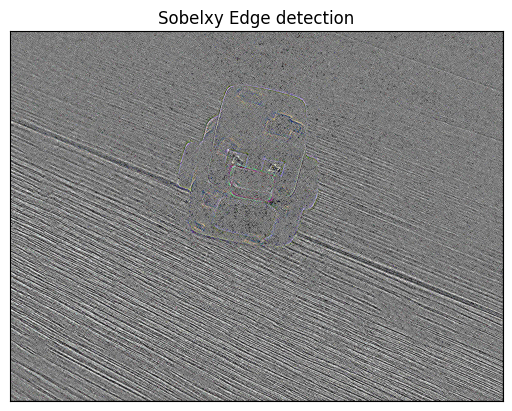

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


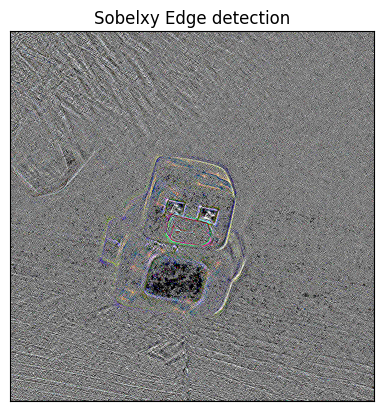

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


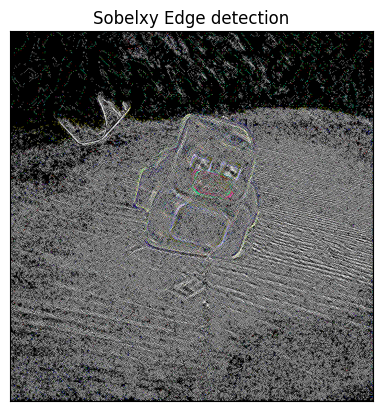

In [73]:
gray_images = []
sobelxy_images = []
for image in range(len(test_images)):
    # Convert to graycsale
    test_images[image] = cv.cvtColor(test_images[image], cv.COLOR_RGB2BGR)
    gray_images.append(cv.cvtColor(test_images[image], cv.COLOR_BGR2GRAY)) 
    # Blur the image for better edge detection
    gray_images[image] = cv.GaussianBlur(test_images[image], (3,3), 0) 

    sobelxy_images.append(cv.Sobel(src=gray_images[image], ddepth=cv.CV_64F, dx=1, dy=1, ksize=5))
    plt.imshow(sobelxy_images[image], cmap='gray')
    plt.title('Sobelxy Edge detection'), plt.xticks([]), plt.yticks([])
    plt.show()
    

The sobel algorithm seemed to have a lot of spurious edge detection. Now let's try the canny edge detection algorithm:

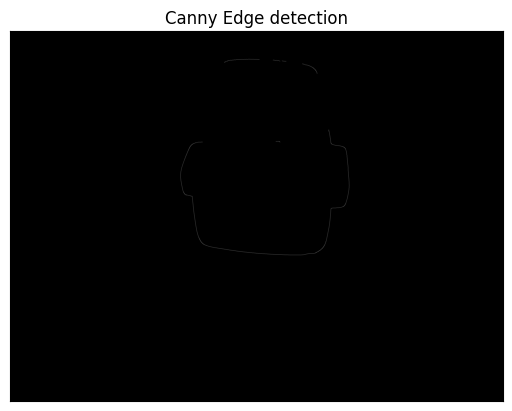

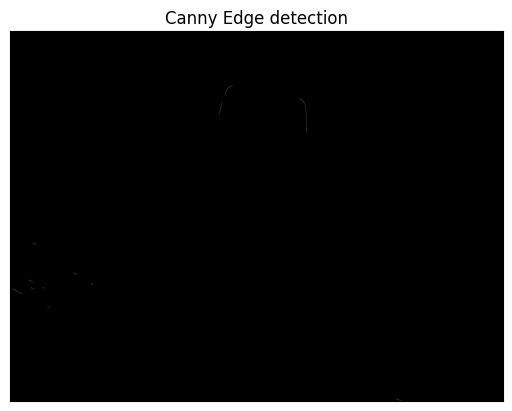

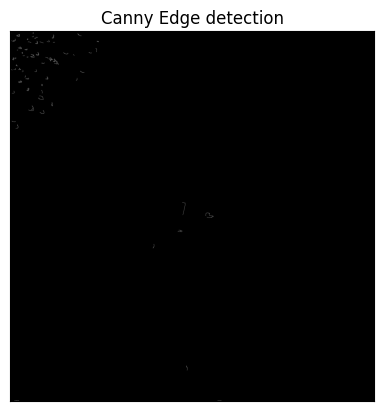

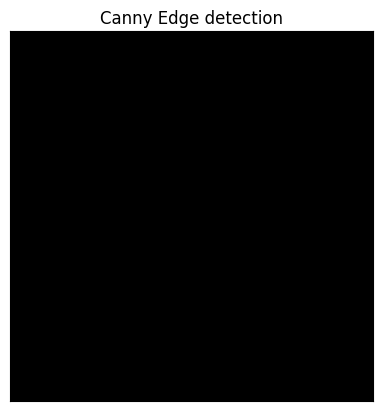

In [74]:
canny_images = []
for image in range(len(test_images)):

    canny_images.append(cv.Canny(image=gray_images[image], threshold1=100, threshold2=200))
    plt.imshow(canny_images[image], cmap='gray')
    plt.title('Canny Edge detection'), plt.xticks([]), plt.yticks([])
    plt.show()

The results of the first attempt at using the Canny edge detection algorithm look unimpressive. Now let's try tuning the threshold values.

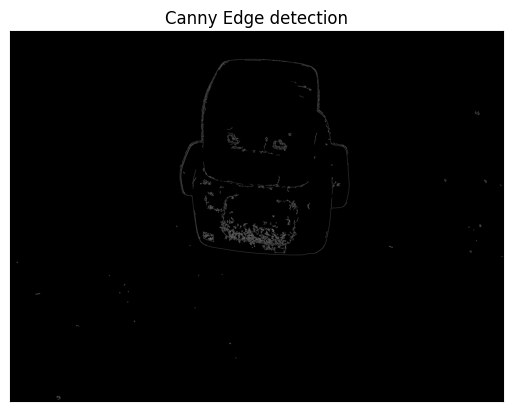

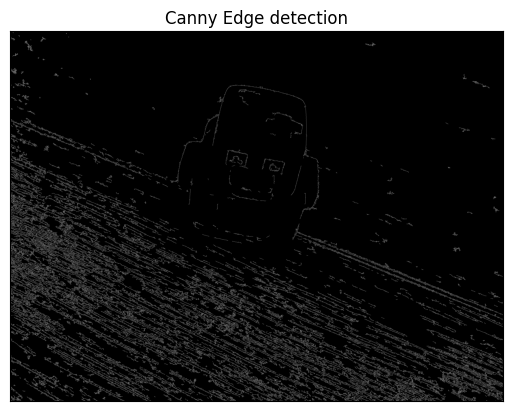

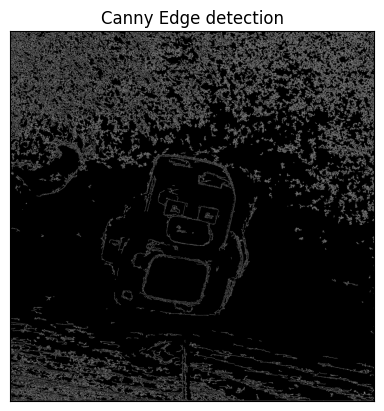

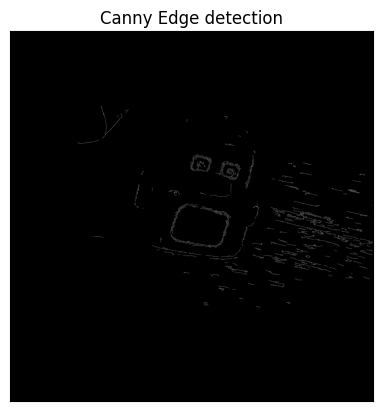

In [75]:
canny_images = []
for image in range(len(test_images)):

    canny_images.append(cv.Canny(image=gray_images[image], threshold1=10, threshold2=50))
    plt.imshow(canny_images[image], cmap='gray')
    plt.title('Canny Edge detection'), plt.xticks([]), plt.yticks([])
    plt.show()

These results are much more impressive. Let's see if we can tune the threshold values further to improve the robustness of this edge detection algorithm.

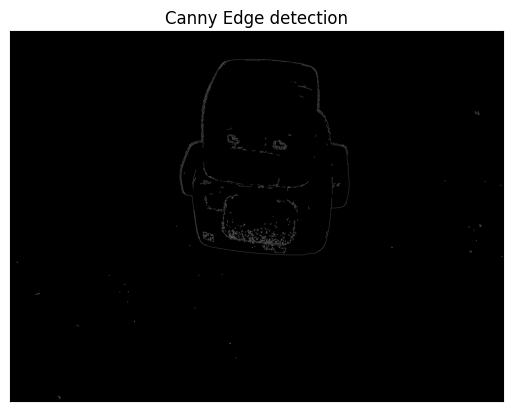

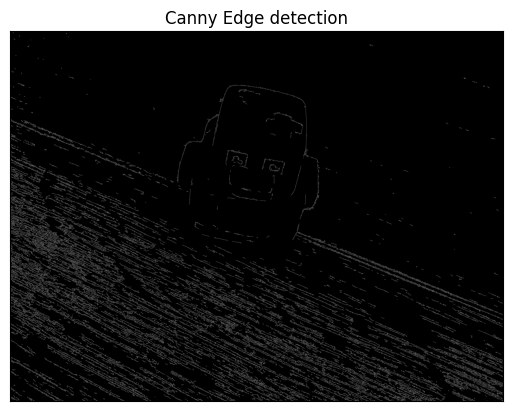

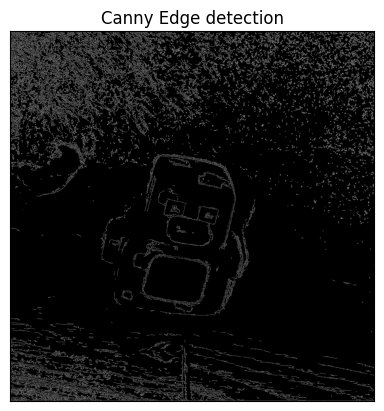

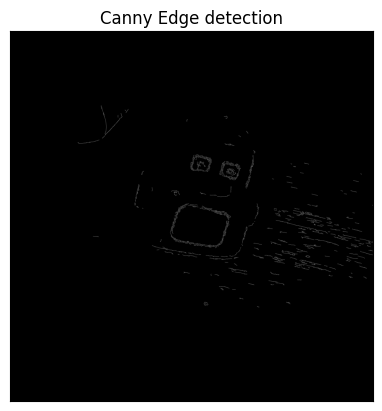

In [76]:
canny_images = []
for image in range(len(test_images)):

    canny_images.append(cv.Canny(image=gray_images[image], threshold1=20, threshold2=50))
    plt.imshow(canny_images[image], cmap='gray')
    plt.title('Canny Edge detection'), plt.xticks([]), plt.yticks([])
    plt.show()

These results prove the Canny edge detection algorithm with the tuned values found through iterative experimentation is a robust edge detecting algorithm. 